# Covid 19 Prediction

#Section 1 Answers:
Predicting the Disease will help to prevent infection and early treatment.
From this data, creating model from it with high accuracy would help in predicting weather the person can get infected with covid or not. This model will predict weather Covid infected or not by statistically calculating correlation between the patients symptoms like Cough symptoms, Fever, Sore throat, Shortness of breath,	Headache and covid test result. The test result could take time for results, but with the help of this model if patient data have valid symptoms we could predict if that person have Covid or not. Hence the treatement would begin much faster and if the person is still not infected we could prevent it earlier.

---

The cases of infections are increasing by hours, to test and find results of RT-PCR test takes time and as the numbers increases the time for tests also increases. This will cause loss of time in treatement of patients and may increase risk of death. With this model, by just entering the patients data and symptoms we could predict if patient is infected or not and start treatment earlier.

---

This data contains large number of patients data whose RT-PCR test results are Negative. The symptoms correlation with Corona results are lower, this affects the accurate prediction of infection and may give bias result in favor of Covid infected as Negative. More data of patients whose results are positive will help in finding patterns with the symptoms and accurate prediction of diease.



In [ ]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime

In [ ]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Corona Capstone Project /corona_tested_006.csv")

<ipython-input-190-4fa2c20bfe95>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/ML/Corona Capstone Project /corona_tested_006.csv")


In [ ]:
df.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.tail(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
df.shape

(278848, 11)

In [ ]:
df[df.duplicated()]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact


In [ ]:
#Checking count of NUll Values in columns
df.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
#Removing unneeded column
df=df.drop(columns="Ind_ID",axis=1)

In [ ]:
#Unique values and there count of each columns
for i in df:
  print(i,df[i].value_counts())
  print("---------------------")

Test_date 20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020

In [ ]:
#Converting Date columns datatype from object to DateTime
df["Test_date"]=pd.to_datetime(df["Test_date"],dayfirst=True)

In [ ]:
df["Test_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 278848 entries, 0 to 278847
Series name: Test_date
Non-Null Count   Dtype         
--------------   -----         
278848 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [ ]:
# Checking None values of columns and corresponding values of other columns,
#Weather other columns are also having None as values if one column is having None as value
df[df["Cough_symptoms"]=="None"]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
68,2020-03-11,None,FALSE,TRUE,FALSE,FALSE,positive,None,None,Abroad
281,2020-03-11,None,None,FALSE,FALSE,FALSE,positive,None,None,Abroad
577,2020-03-12,None,None,None,None,None,positive,None,None,Other
2664,2020-03-15,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
4442,2020-03-16,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
95936,2020-04-04,None,None,False,False,False,negative,No,male,Other
95937,2020-04-04,None,None,False,False,False,negative,No,female,Other
95938,2020-04-04,None,None,False,False,False,negative,Yes,male,Other
95939,2020-04-04,None,None,False,False,False,negative,No,female,Other


#Correcting values in data


In [ ]:
#For symptoms columns,True and False are having variation in casings(Upper & Lower), datatype(Boolian, object, string)
#To covert all this values to respected single values (True and False) and datatype (String), used map function
#None as values were not mapped here as they where not precise
d1={
    "Cough_symptoms":{"TRUE":"True","FALSE":"False",True:"True",False:"False"},
    "Fever":{"TRUE":"True","FALSE":"False",True:"True",False:"False"},
    "Sore_throat":{"TRUE":"True","FALSE":"False",True:"True",False:"False"},
    "Shortness_of_breath":{"TRUE":"True","FALSE":"False",True:"True",False:"False"},
    "Headache":{"TRUE":"True","FALSE":"False",True:"True",False:"False"},
}

for i in df:
  if i in d1:
    df[i]=df[i].map(d1[i])

df.head(10)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,None,None,Abroad
1,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
2,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
3,2020-03-11,True,False,False,False,False,negative,None,None,Abroad
4,2020-03-11,True,False,False,False,False,negative,None,None,Contact with confirmed
5,2020-03-11,True,False,False,False,False,other,None,None,Contact with confirmed
6,2020-03-11,False,False,False,False,False,negative,None,None,Other
7,2020-03-11,False,True,False,False,False,negative,None,None,Abroad
8,2020-03-11,True,False,False,False,False,negative,None,None,Abroad
9,2020-03-11,True,False,True,False,False,negative,None,None,Abroad


In [ ]:
df1=df.copy()

#Imputation

In [ ]:
#Checking the null values after mapping
#None as values were converted to NULL
df.isnull().sum()

Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

In [ ]:
#Simple imputer with strategy as MOst Frequent for categorical variables to impute NULL values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="most_frequent")
df["Cough_symptoms"]=si.fit_transform(df[["Cough_symptoms"]])
df["Fever"]=si.fit_transform(df[["Fever"]])
df["Sore_throat"]=si.fit_transform(df[["Sore_throat"]])
df["Shortness_of_breath"]=si.fit_transform(df[["Shortness_of_breath"]])
df["Headache"]=si.fit_transform(df[["Headache"]])

In [ ]:
#Checking NULL values after imputation
df.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

#Analysis

<Axes: xlabel='count', ylabel='Headache'>

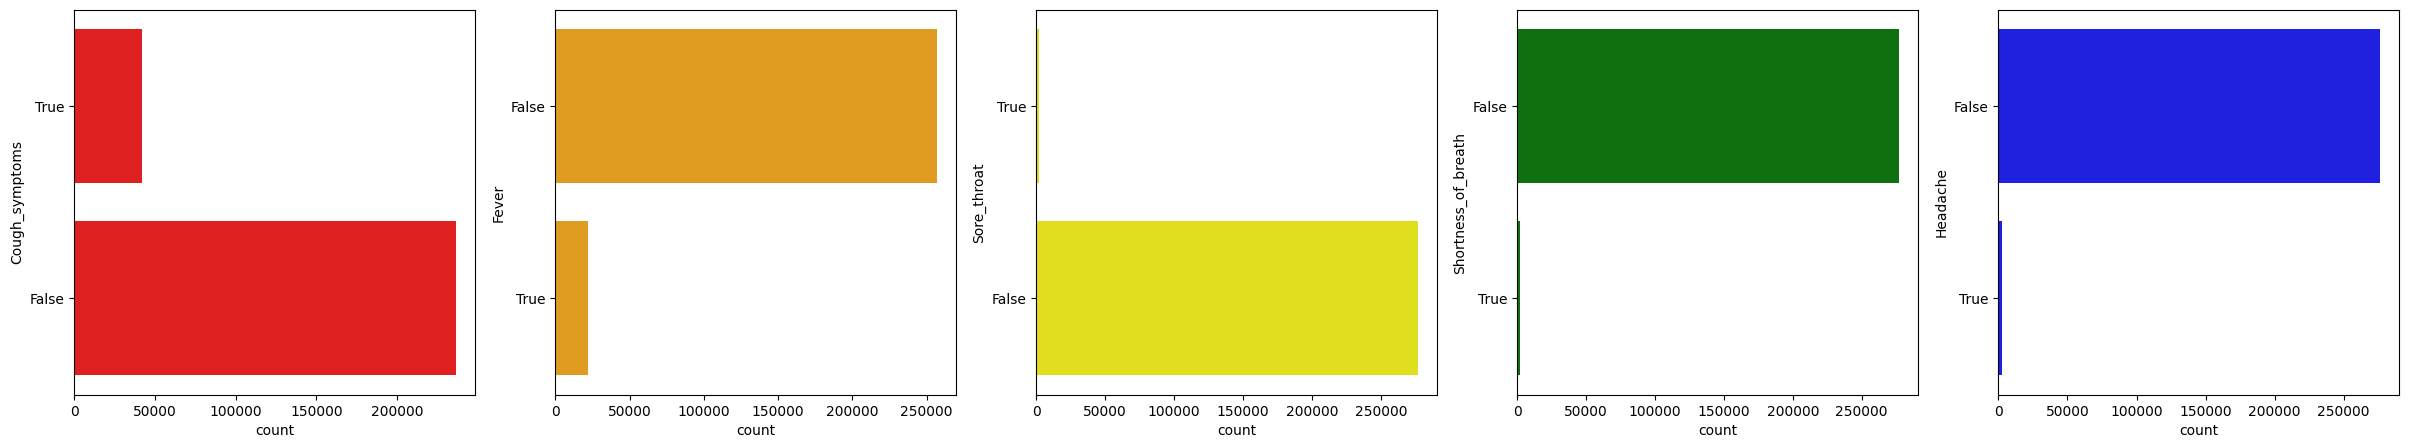

In [ ]:
#Count plot for different symptoms
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
sns.countplot(df['Cough_symptoms'],color='red')
plt.subplot(1,5,2)
sns.countplot(df['Fever'],color='orange')
plt.subplot(1,5,3)
sns.countplot(df['Sore_throat'],color='yellow')
plt.subplot(1,5,4)
sns.countplot(df['Shortness_of_breath'],color='green')
plt.subplot(1,5,5)
sns.countplot(df['Headache'],color='blue')

Above, we could see Count plot for different symptoms patients are having,
weather they have those symptoms or not (True and False).

<Axes: xlabel='count', ylabel='Corona'>

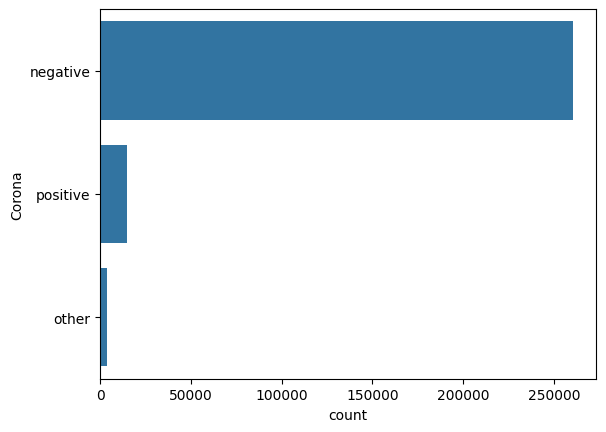

In [ ]:
sns.countplot(df["Corona"])

Count plot for patients which are tested and which are positive, negative or other.

In [ ]:
#Removing rows from data, where Corona values are other
#Other values are irrelevant here, So removing them from dataset
df=df[df["Corona"]!="other"]
df['Corona'].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

#Encoding

In [ ]:
#One hot encoder is used for nominal data and map or lebelencoder is user for ordinal data
#Using One hot encoder for categorical columns which are Nominal
df=pd.get_dummies(df,columns=["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Sex","Known_contact","Age_60_above"],drop_first=True)
df.head(5)

,Test_date,Corona,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_None,Age_60_above_Yes
0,2020-03-11,negative,1,0,1,0,0,0,0,0,0,1,0
1,2020-03-11,positive,0,1,0,0,0,0,0,0,0,1,0
2,2020-03-11,positive,0,1,0,0,0,0,0,0,0,1,0
3,2020-03-11,negative,1,0,0,0,0,0,0,0,0,1,0
4,2020-03-11,negative,1,0,0,0,0,0,0,1,0,1,0


In [ ]:
#Using map encoding on Target variable, i.e Corona
#Creating a dictionary
d2={
    "Corona":{"negative":0,"positive":1}
}

In [ ]:
#Mapping
for i in df:
  if i in d2:
    df[i]=df[i].map(d2[i])

df.head(5)

,Test_date,Corona,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_None,Age_60_above_Yes
0,2020-03-11,0,1,0,1,0,0,0,0,0,0,1,0
1,2020-03-11,1,0,1,0,0,0,0,0,0,0,1,0
2,2020-03-11,1,0,1,0,0,0,0,0,0,0,1,0
3,2020-03-11,0,1,0,0,0,0,0,0,0,0,1,0
4,2020-03-11,0,1,0,0,0,0,0,0,1,0,1,0


<Axes: >

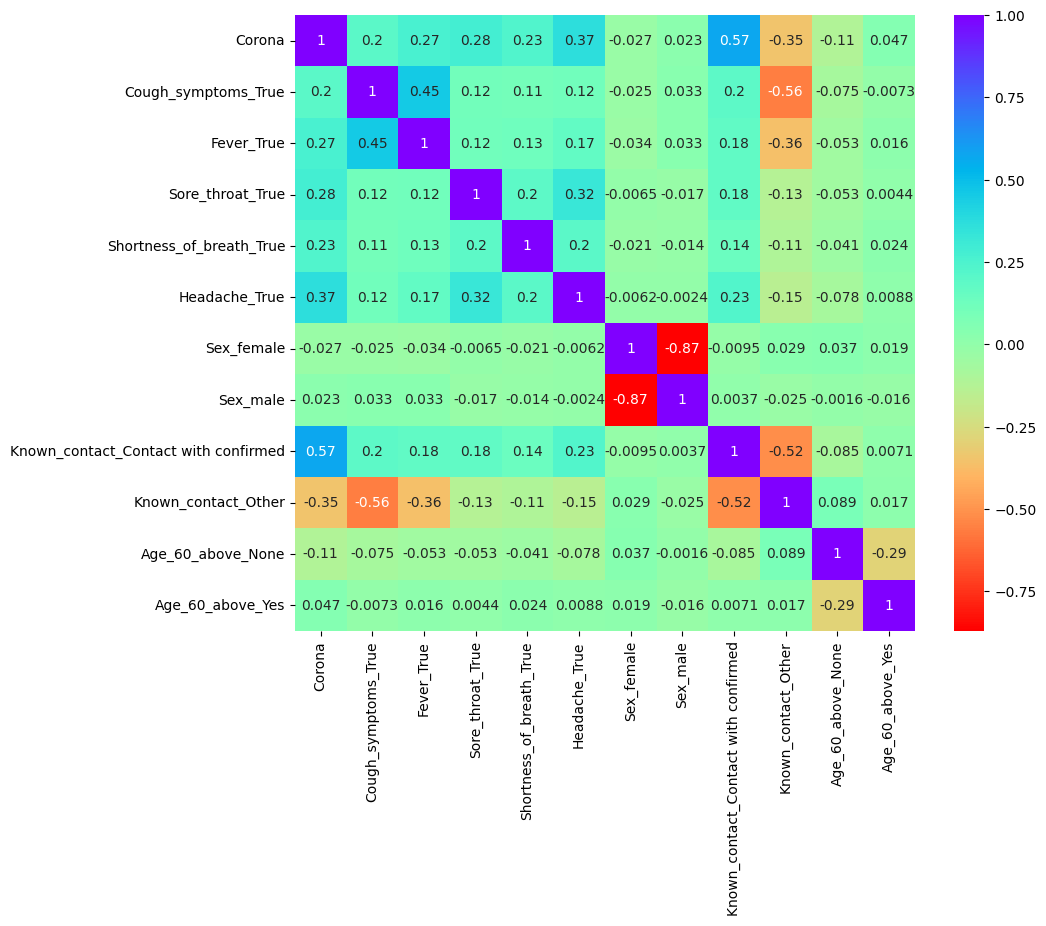

In [ ]:
#Heatmap plot, to see correlation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(df[["Corona","Cough_symptoms_True","Fever_True","Sore_throat_True","Shortness_of_breath_True","Headache_True","Sex_female","Sex_male",
                "Known_contact_Contact with confirmed","Known_contact_Other","Age_60_above_None","Age_60_above_Yes"]].corr(),cmap="rainbow_r",annot=True)

From above plot, Age and sex column are less correlated to the Corona column (Target variable), as there are negative values and lower r value compare to other independent variables. But as this are categorical data, we should see there association with target variable by using Chi-square test.

#Chi-Square Test
As the data is categorical, to see the Satistical significance between the columns we perform Chi-Square test. Initializing Hypothesis,

---
Null Hypothesis : There is No Significant association between target variable and independent variable.

Alternate Hypothesis : There is Significant association between target variable and independent variable.

---

Here we would find out the p-value by performing chi-square test target variable and independent variable and initiate the significance values (alpha) as 0.05. So if p-values is less then alpha we would reject Null Hypothesis and if p-values is greater then alpha we would fail to reject NUll Hypothesis. This will tell us weather there is significant association or relation between target variable and independent variable.

In [ ]:
from scipy import stats
crosstab_sex_female=pd.crosstab(df["Corona"],df["Sex_female"])
chi2_stat, p_val, dof, expected=stats.chi2_contingency(crosstab_sex_female)
print(p_val)
if p_val<0.05:
  print("Rejecting Null Hypothesis, there is significant association between columns")
else:
  print("Fail to reject Null Hypothesis, there is no significant association between columns")

1.3896860671345805e-46
Rejecting Null Hypothesis, there is significant association between columns


In [ ]:
crosstab_sex_male=pd.crosstab(df["Corona"],df["Sex_male"])
stats.chi2_contingency(crosstab_sex_male)
chi2_stat, p_val, dof, expected=stats.chi2_contingency(crosstab_sex_male)
print(p_val)
if p_val<0.05:
  print("Rejecting Null Hypothesis, there is significant association between columns")
else:
  print("Fail to reject Null Hypothesis, there is no significant association between columns")

3.349829634729112e-32
Rejecting Null Hypothesis, there is significant association between columns


In [ ]:
crosstab_sex_male=pd.crosstab(df["Corona"],df["Sex_female"])
stats.chi2_contingency(crosstab_sex_male)
chi2_stat, p_val, dof, expected=stats.chi2_contingency(crosstab_sex_male)
print(p_val)
if p_val<0.05:
  print("Rejecting Null Hypothesis, there is significant association between columns")
else:
  print("Fail to reject Null Hypothesis, there is no significant association between columns")

1.3896860671345805e-46
Rejecting Null Hypothesis, there is significant association between columns


In [ ]:
crosstab_contact_other=pd.crosstab(df["Corona"],df["Age_60_above_None"])
stats.chi2_contingency(crosstab_contact_other)
chi2_stat, p_val, dof, expected=stats.chi2_contingency(crosstab_contact_other)
print(p_val)
if p_val<0.05:
  print("Rejecting Null Hypothesis, there is significant association between columns")
else:
  print("Fail to reject Null Hypothesis, there is no significant association between columns")

0.0
Rejecting Null Hypothesis, there is significant association between columns


In [ ]:
crosstab_age=pd.crosstab(df["Corona"],df["Age_60_above_Yes"])
stats.chi2_contingency(crosstab_age)
chi2_stat, p_val, dof, expected=stats.chi2_contingency(crosstab_age)
print(p_val)
if p_val<0.05:
  print("Rejecting Null Hypothesis, there is significant association between columns")
else:
  print("Fail to reject Null Hypothesis, there is no significant association between columns")

1.148597033847908e-133
Rejecting Null Hypothesis, there is significant association between columns


From above Chi-Square test it is concluded that there is significant association between the target variable and independent variable.

#Section 3 Answers:
As the Data is Categorical and Nominal, we use Chi-Square test to prove or disprove the Hypothesis initialized. From this test we can prove weather the target and independent variables are significantly associated or not.

---

For feature selection, we used Recursive feature elimination of wrapper method to remove less contributing variables and keep required number of dimension for better evaluation of model. It will calculate weight of each independent variable with respect to target variable and eliminate variable which contributes less.


#Model Building


In [ ]:
#Spliting data for train and test based on Tested date.
train_data=df[df.Test_date<datetime(2020,4,16)]
test_data=df[df.Test_date>datetime(2020,4,15)]


In [ ]:
train_data["Test_date"].value_counts()

2020-04-01    8585
2020-04-02    8107
2020-04-03    7993
2020-04-13    7900
2020-04-05    7451
2020-03-31    7080
2020-04-15    7066
2020-04-14    6491
2020-03-26    6481
2020-04-07    5897
2020-04-12    5888
2020-03-30    5862
2020-03-27    5809
2020-04-10    5611
2020-03-28    5518
2020-03-25    5411
2020-04-06    5341
2020-03-29    5216
2020-04-04    5088
2020-03-24    4670
2020-04-09    4523
2020-04-11    4277
2020-04-08    4020
2020-03-22    3528
2020-03-23    3445
2020-03-19    2222
2020-03-18    1957
2020-03-20    1853
2020-03-21    1639
2020-03-17    1429
2020-03-16    1265
2020-03-15     891
2020-03-13     682
2020-03-12     630
2020-03-14     605
2020-03-11     286
Name: Test_date, dtype: int64

In [ ]:

test_data["Test_date"].value_counts()

2020-04-20    10815
2020-04-19    10119
2020-04-21     9483
2020-04-22     9422
2020-04-16     9066
2020-04-23     8539
2020-04-17     7436
2020-04-30     7269
2020-04-27     7247
2020-04-24     6985
2020-04-28     6267
2020-04-18     6253
2020-04-26     6078
2020-04-25     5029
2020-04-29     4231
Name: Test_date, dtype: int64

In [ ]:
#Spliting Target and Independent variables to x and y
x_train=train_data.drop(columns="Corona",axis=1)
x_test=test_data.drop(columns="Corona",axis=1)
y_train=train_data["Corona"]
y_test=test_data["Corona"]

In [ ]:
#Reducing Dimension of data
#Droping tested date column from x_test and x_train as they are not significant for model building
x_train=x_train.drop(columns="Test_date",axis=1)
x_test=x_test.drop(columns="Test_date",axis=1)

In [ ]:
x_train

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_None,Age_60_above_Yes
0,1,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,0,1,0,1,1,0
163185,0,0,0,0,0,0,1,0,1,1,0
163186,0,0,0,0,0,1,0,0,1,1,0
163187,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160717, dtype: int64

In [ ]:
x_test

,Cough_symptoms_True,Fever_True,Sore_throat_True,Shortness_of_breath_True,Headache_True,Sex_female,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above_None,Age_60_above_Yes
163189,1,0,0,0,0,1,0,0,0,1,0
163190,0,0,0,0,0,1,0,0,1,1,0
163191,1,0,0,0,0,1,0,0,0,1,0
163192,0,0,0,0,0,0,1,0,1,1,0
163193,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,0,1,0,1,1,0
278844,0,0,0,0,0,1,0,0,1,1,0
278845,0,0,0,0,0,0,1,0,1,1,0
278846,0,0,0,0,0,0,1,0,1,1,0


In [ ]:
y_test

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64

#Model Training


In [ ]:
#Using Logistic Regression for model training as data is categorical
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Evaluation
y_pred_lgr = lgr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,mean_squared_error,r2_score

In [ ]:
#Calculating scores of trained model
Lgr_acc = accuracy_score(y_test,y_pred_lgr)
Lgr_pre = precision_score(y_test,y_pred_lgr)
Lgr_recall = recall_score(y_test,y_pred_lgr)
Lgr_f1 = f1_score(y_test,y_pred_lgr)

print("Logistic Regression accuracy score =",Lgr_acc)
print("Logistic Regression Precision score =",Lgr_pre)
print("Logistic Regression Recall score =",Lgr_recall)
print("Logistic Regression f1 score =",Lgr_f1)

Logistic Regression accuracy score = 0.9779672441110304
Logistic Regression Precision score = 0.6913319238900634
Logistic Regression Recall score = 0.12120088954781319
Logistic Regression f1 score = 0.20624408703878902


In [ ]:
#Recursive Feature Elimination Feature selection technique
from sklearn.feature_selection import RFE
model = LogisticRegression()

# Initialize RFE with the model and number of features to select
n_features_to_select = 5
rfe = RFE(model, n_features_to_select=n_features_to_select)

# Fit RFE to training data
rfe.fit(x_train, y_train)

# Get selected features
selected_features = x_train.columns[rfe.support_]
selected_features

Index(['Fever_True', 'Sore_throat_True', 'Shortness_of_breath_True',
       'Headache_True', 'Known_contact_Contact with confirmed'],
      dtype='object')

In [ ]:
x1_train=x_train[selected_features]
x1_test=x_test[selected_features]

In [ ]:
model.fit(x1_train,y_train)

LogisticRegression()

In [ ]:
y1_pred=model.predict(x1_test)

In [ ]:
#Calculating scores of trained model
Lgr1_acc = accuracy_score(y_test,y1_pred)
Lgr1_pre = precision_score(y_test,y1_pred)
Lgr1_recall = recall_score(y_test,y1_pred)
Lgr1_f1 = f1_score(y_test,y1_pred)

print("Logistic regression after RFE, accuracy score =",Lgr1_acc)
print("Logistic regression after RFE, Precision score =",Lgr1_pre)
print("Logistic regression after RFE, Recall score =",Lgr1_recall)
print("Logistic regression after RFE, f1 score =",Lgr1_f1)

Logistic regression after RFE, accuracy score = 0.9779672441110304
Logistic regression after RFE, Precision score = 0.689727463312369
Logistic regression after RFE, Recall score = 0.12194217939214233
Logistic regression after RFE, f1 score = 0.20724409448818898


There is not much improvement in precision or recall after applying Recursive Feature elimination method on the model

In [ ]:
l={"Lgr_f1":Lgr_f1,"Lgr1_f1":Lgr1_f1}
lgr_a=pd.DataFrame(l.items(),columns=["Model","F1 Score"])
lgr_a

,Model,F1 Score
0,Lgr_f1,0.206244
1,Lgr1_f1,0.207244


<Axes: xlabel='Model', ylabel='F1 Score'>

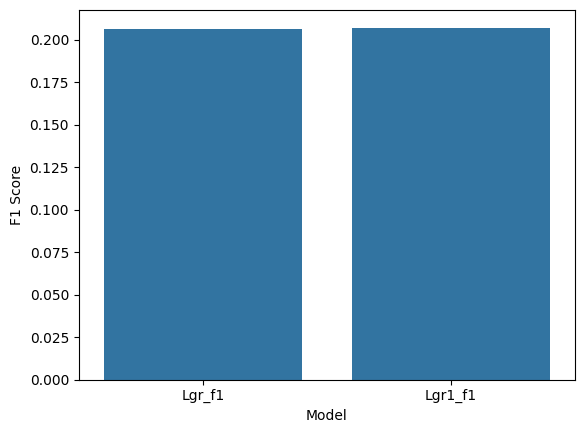

In [ ]:
sns.barplot(x=lgr_a["Model"],y=lgr_a["F1 Score"])

But, Compairing Logistic regression model with all features and features selected after performing recursive feature elimination technique to remove features which contributes less to model. As we can see from above evaluated there is not much difference but slight improvement in f1_score of model

In [ ]:
#Decision tree Classification
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc=dtc.predict(x_test)

In [ ]:
#Calculating scores of trained model
Dtc_acc = accuracy_score(y_test,y_pred_dtc)
Dtc_pre = precision_score(y_test,y_pred_dtc)
Dtc_recall = recall_score(y_test,y_pred_dtc)
Dtc_f1 = f1_score(y_test,y_pred_dtc)

print("Decision Tree accuracy score =",Dtc_acc)
print("Decision Tree Precision score =",Dtc_pre)
print("Decision Tree Recall score =",Dtc_recall)
print("Decision Tree f1 score =",Dtc_f1)

Decision Tree accuracy score = 0.985215206715745
Decision Tree Precision score = 0.7546693589096416
Decision Tree Recall score = 0.5541141586360266
Decision Tree f1 score = 0.6390254327847831


In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc=rfc.predict(x_test)

In [ ]:
#Calculating scores of trained model
Rfc_acc = accuracy_score(y_test,y_pred_rfc)
Rfc_pre = precision_score(y_test,y_pred_rfc)
Rfc_recall = recall_score(y_test,y_pred_rfc)
Rfc_f1 = f1_score(y_test,y_pred_rfc)

print("Random Forest Classifier accuracy score =",Rfc_acc)
print("Random Forest Classifier Precision score =",Rfc_pre)
print("Random Forest Classifier Recall score =",Rfc_recall)
print("Random Forest Classifier f1 score =",Rfc_f1)

Random Forest Classifier accuracy score = 0.9852414674498201
Random Forest Classifier Precision score = 0.7545271629778671
Random Forest Classifier Recall score = 0.5559673832468495
Random Forest Classifier f1 score = 0.6402048655569782


In [ ]:
#k-fold Cross Validation technique
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x_train,y_train,scoring="f1",cv=5)

In [ ]:
cv_score

array([0.60873606, 0.72017045, 0.73342939, 0.6421976 , 0.56967759])

Logistic Regression accuracy score = 0.9779672441110304
Logistic Regression Precision score = 0.6913319238900634
Logistic Regression Recall score = 0.12120088954781319
Logistic Regression f1 score = 0.20624408703878902

In [ ]:
#XGBoost
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)

In [ ]:
#Calculating confusion matrix of trained model
Xgb_acc = accuracy_score(y_test,y_pred_xgb)
Xgb_pre = precision_score(y_test,y_pred_xgb)
Xgb_recall = recall_score(y_test,y_pred_xgb)
Xgb_f1 = f1_score(y_test,y_pred_xgb)

print("XG Boost Classifier accuracy score =",Xgb_acc)
print("XG Boost Classifier Precision score =",Xgb_pre)
print("XG Boost Classifier Recall score =",Xgb_recall)
print("XG Boost Classifier f1 score =",Xgb_f1)

XG Boost Classifier accuracy score = 0.9852502210278451
XG Boost Classifier Precision score = 0.7546505781799899
XG Boost Classifier Recall score = 0.5563380281690141
XG Boost Classifier f1 score = 0.6404949861318542


In [ ]:
f={"Lgr1_f1":Lgr1_f1,"Dtc_f1":Dtc_f1,"Rfc_f1":Rfc_f1,"Xgb_f1":Xgb_f1}
F1=pd.DataFrame(f.items(),columns=["Model","Score"])
F1

,Model,Score
0,Lgr1_f1,0.207244
1,Dtc_f1,0.639025
2,Rfc_f1,0.640205
3,Xgb_f1,0.640495


Text(0.5, 1.0, 'f1_score of Models')

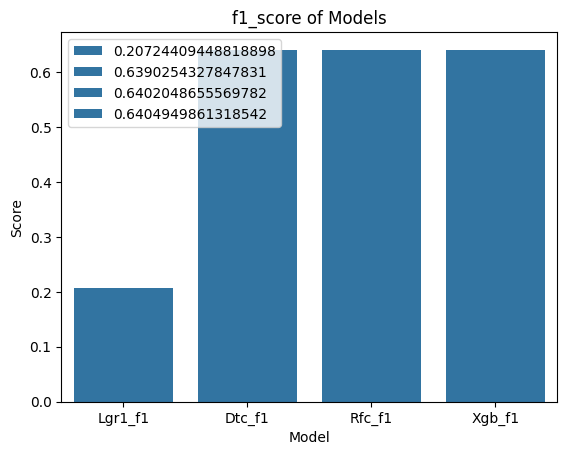

In [ ]:
sns.barplot(x=F1["Model"],y=F1["Score"],label=F1["Score"])
plt.title("f1_score of Models")


In [ ]:
r={"Lgr1_recall":Lgr1_recall,"Dtc_recall":Dtc_recall,"Rfc_recall":Rfc_recall,"Xgb_recall":Xgb_recall}
Recall=pd.DataFrame(r.items(),columns=["Model","Score"])
Recall

,Model,Score
0,Lgr1_recall,0.121942
1,Dtc_recall,0.554114
2,Rfc_recall,0.555967
3,Xgb_recall,0.556338


Text(0.5, 1.0, 'recall_score of Models')

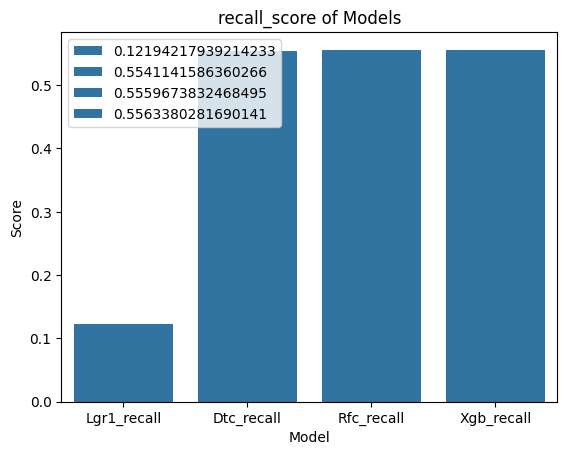

In [ ]:
sns.barplot(x=Recall["Model"],y=Recall["Score"],label=Recall["Score"])
plt.title("recall_score of Models")

In [ ]:
p={"Lgr1_pre":Lgr1_pre,"Dtc_pre":Dtc_pre,"Rfc_pre":Rfc_pre,"Xgb_pre":Xgb_pre}
Precision=pd.DataFrame(p.items(),columns=["Model","Score"])
Precision

,Model,Score
0,Lgr1_pre,0.689727
1,Dtc_pre,0.754669
2,Rfc_pre,0.754527
3,Xgb_pre,0.754651


Text(0.5, 1.0, 'precision_score of Models')

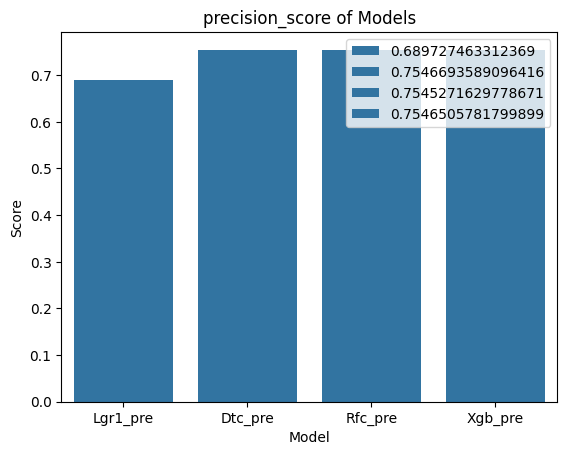

In [ ]:
sns.barplot(x=Precision["Model"],y=Precision["Score"],label=Precision["Score"])
plt.title("precision_score of Models")

#Section 4 Answers:
We have trained model in 4 different types Logistic Regression, Decision Tree, Random Forest Classifier and XGBoost Classifier. We have compaired all models above with bar charts, with plots of models vs precision score, recall score and f1 score. As this is Binanry Classification model, to evaluate or model we use precision, recall and f1 score. Precision gives fraction of positive values predicted out of all postive and Recall gives fraction of true values out of actual values. But for this model only precision or recall is not enough, we need both values for evaluating the models. So we go for f1_score of models which is balance betweeen both precision and recall.

---

XGBoost is most suitable for this model with highest f1_score, precision and recall score. Here the model learns slowly and errors are improved model by model as it builds sequentially. As the errors are improved slowly, it recuces the problem of underfitting and overfitting and gradually improves the model.

#SQL Queries

In [ ]:
import duckdb
conn = duckdb.connect()
conn.register("df1",df1)

In [ ]:
conn.execute("Select * from df1").fetchdf()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,None,None,Abroad
1,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
2,2020-03-11,False,True,False,False,False,positive,None,None,Abroad
3,2020-03-11,True,False,False,False,False,negative,None,None,Abroad
4,2020-03-11,True,False,False,False,False,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,positive,None,male,Other
278844,2020-04-30,False,False,False,False,False,negative,None,female,Other
278845,2020-04-30,False,False,False,False,False,negative,None,male,Other
278846,2020-04-30,False,False,False,False,False,negative,None,male,Other


In [ ]:
for i in df1:
  print(i,df1[i].value_counts())
  print("---------------------")

Test_date 2020-04-20    10921
2020-04-19    10199
2020-04-22     9646
2020-04-21     9624
2020-04-16     9138
2020-04-23     8744
2020-04-01     8654
2020-04-13     8425
2020-04-02     8188
2020-04-03     8079
2020-04-17     7645
2020-04-05     7509
2020-04-30     7313
2020-04-27     7304
2020-04-15     7149
2020-03-31     7134
2020-04-24     7028
2020-03-26     6663
2020-04-14     6571
2020-04-28     6334
2020-04-18     6321
2020-04-26     6131
2020-04-12     5984
2020-03-27     5963
2020-04-07     5931
2020-03-30     5915
2020-04-10     5678
2020-03-28     5602
2020-03-25     5495
2020-04-06     5368
2020-03-29     5277
2020-04-04     5145
2020-04-25     5052
2020-03-24     4735
2020-04-09     4539
2020-04-11     4341
2020-04-29     4259
2020-04-08     4058
2020-03-22     3565
2020-03-23     3494
2020-03-19     2243
2020-03-18     1991
2020-03-20     1870
2020-03-21     1648
2020-03-17     1463
2020-03-16     1304
2020-03-15      985
2020-03-13      686
2020-03-12      634
2020-03-14

In [ ]:
#Total number of patients who face shortness of breath
conn.execute("Select count(*) from df1 where Shortness_of_breath='True'").fetchdf()

,count_star()
0,1577


In [ ]:
#Count of Corona positive patients who face shortness of breath
conn.execute("Select count(*) from df1 where Corona='positive' and Shortness_of_breath='True' ").fetchdf()

,count_star()
0,1164


In [ ]:
conn.execute("Select count(*) from df1 where Corona='negative' and Sore_throat='True' and Fever='True'").fetchdf()

,count_star()
0,121


In [ ]:
conn.execute("select month(Test_date) as Month, count(*) as Count, rank() over (order by Count desc) as Rank from df1 where Corona='positive' group by 1 order by 1").fetchdf()

,Month,Count,Rank
0,3,5848,2
1,4,8881,1


In [ ]:
conn.execute("select * from (select * from df1 where sex='female' and Corona='negative') where Cough_symptoms='True' or Headache='True'").fetchdf()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-22,True,False,False,False,False,negative,No,female,Abroad
1,2020-03-22,True,False,False,False,False,negative,Yes,female,Contact with confirmed
2,2020-03-22,True,False,True,False,False,negative,No,female,Abroad
3,2020-03-22,True,True,True,False,True,negative,No,female,Abroad
4,2020-03-22,True,True,True,True,False,negative,No,female,Abroad
...,...,...,...,...,...,...,...,...,...,...
15593,2020-04-30,True,False,False,False,False,negative,None,female,Abroad
15594,2020-04-30,True,False,False,False,False,negative,None,female,Abroad
15595,2020-04-30,True,True,False,False,False,negative,None,female,Abroad
15596,2020-04-30,True,False,False,False,False,negative,None,female,Abroad


In [ ]:
conn.execute("select count(*) Number_of_Elderly_Patients from df1 where Age_60_above='Yes' and Shortness_of_breath='True'").fetchdf()

,Number_of_Elderly_Patients
0,292
